# NGC 338 (UGC 624)

Галактика из диплома.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N0338'
gtype = 'Sab' #TODO:check
incl = 64.  #adopted  by  Zasov
scale = 0.292 #kpc/arcsec according to ApJ 142 145(31pp) 2011

data_path = '../../data/ngc338'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи
* Zasov 2012 https://ui.adsabs.harvard.edu/#abs/2012AstBu..67..362Z/abstract
* https://ui.adsabs.harvard.edu/#abs/1998AJ....115..405L/abstract (оценки на суммарную массу $\rm{HI}$ и $\rm{H_2}$)
* https://ui.adsabs.harvard.edu/#abs/2011MNRAS.416.2437H/abstract (указание на то, что она взаимодействующая)
* Noordermeer Hulst 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract (фотометрия, декомпозиция)

## Разное

In [7]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+338&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [8]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc338 width=1000 height=350></iframe>')

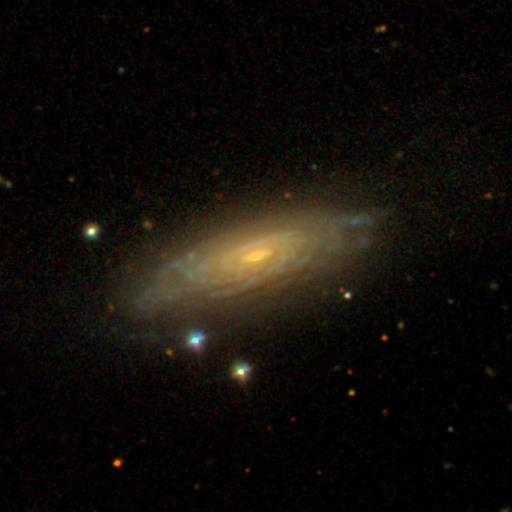

In [9]:
#SDSS
Image('ngc338_SDSS.jpeg', width=300)

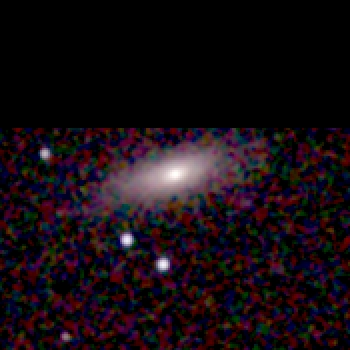

In [10]:
#JHK
Image('ngc338_JHK.jpg', width=300)

### Noordermeer thesis data:

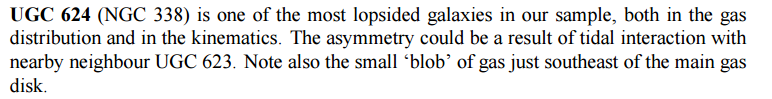

In [11]:
Image('noordermeer_data/n338_cite_p36.png')

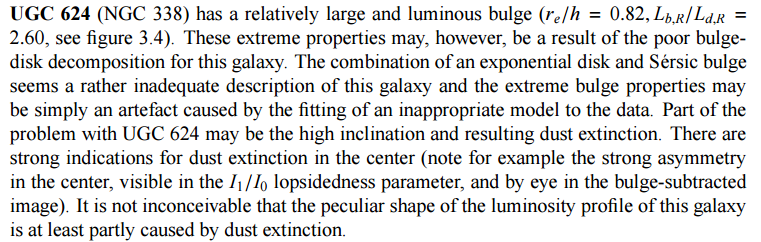

In [12]:
Image('noordermeer_data/n338_cite_p110.png')

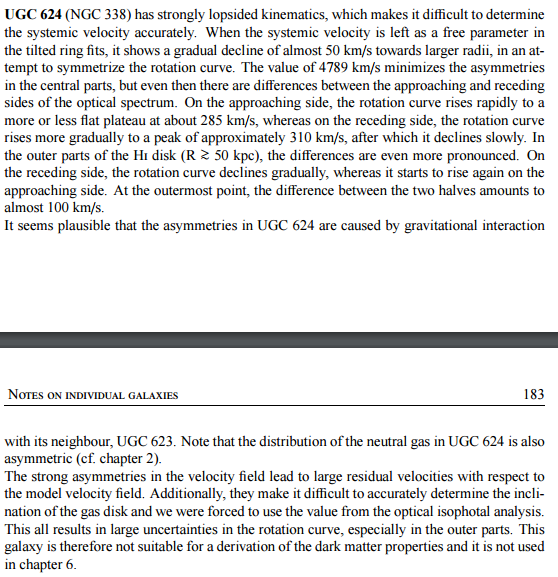

In [13]:
Image('noordermeer_data/n338_cite_pp181_182.png')

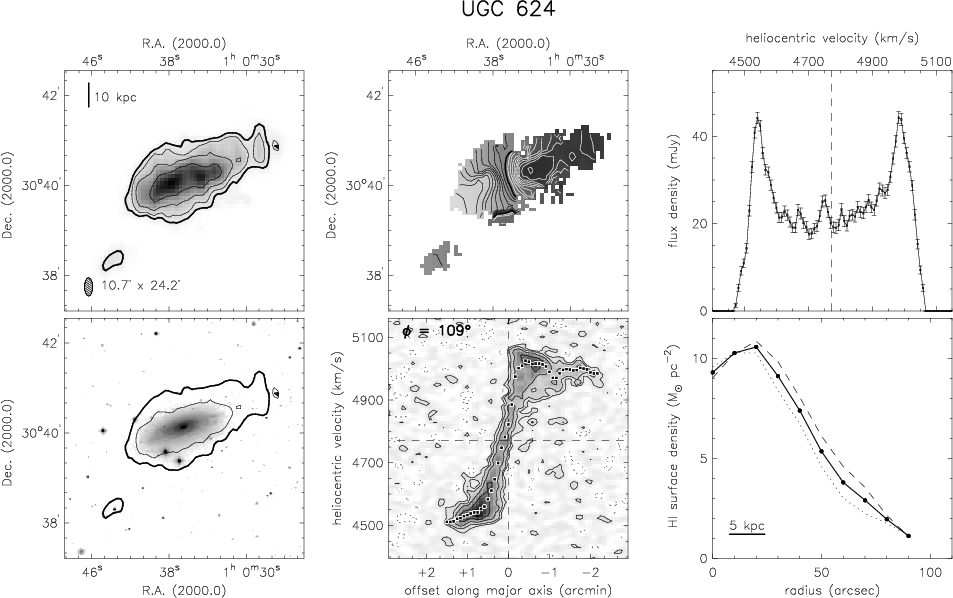

In [14]:
Image('noordermeer_data/HI_data.png')

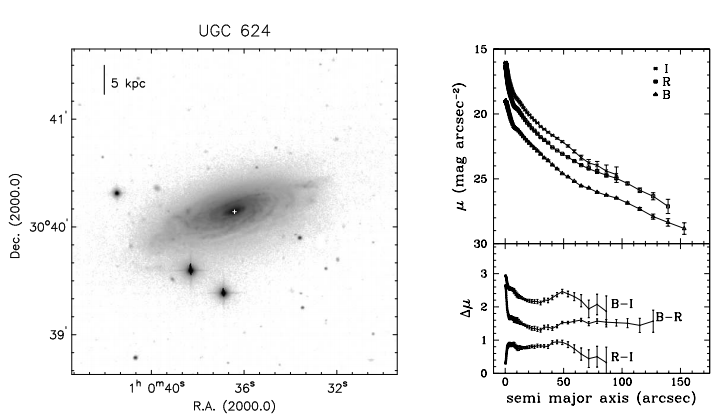

In [15]:
Image('noordermeer_data/n338_photom.png')

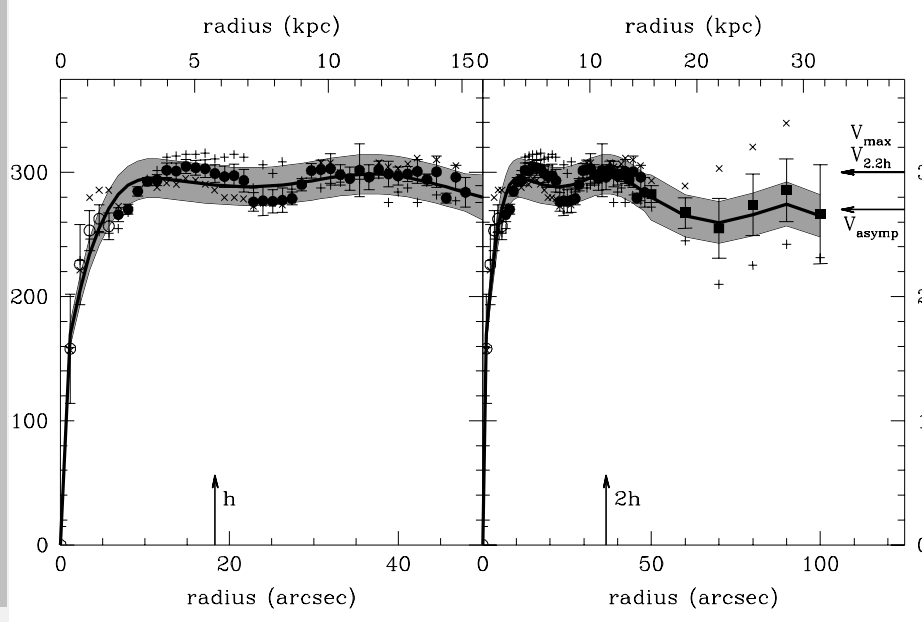

In [16]:
Image('noordermeer_data/n338_rc.png')

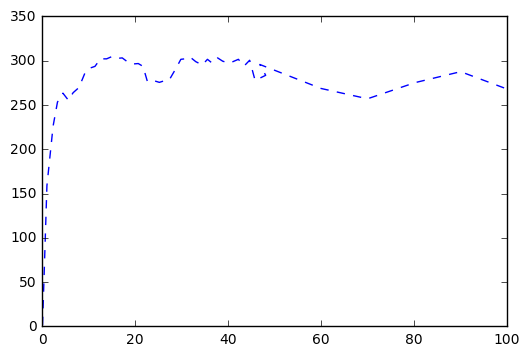

In [17]:
#точки, снятые с предыдущей картинки с помощью WebPlotDigitizer
r_ma, vel_ma = zip(*np.loadtxt("noordermeer_data/n338_rc_noorderm.dat", float, delimiter=','))
plt.plot(r_ma, vel_ma, '--')
# plt.xlim(0, 100)
# plt.ylim(0, 500)
plt.show()

TODO: отнести эти данные куда-нибудь

Наконец последнее - все табличные данные из диссертации:

In [18]:
# TODO: добавить

TODO: добавить данные засова

## Кинематические данные по звездам

### Кривая вращения

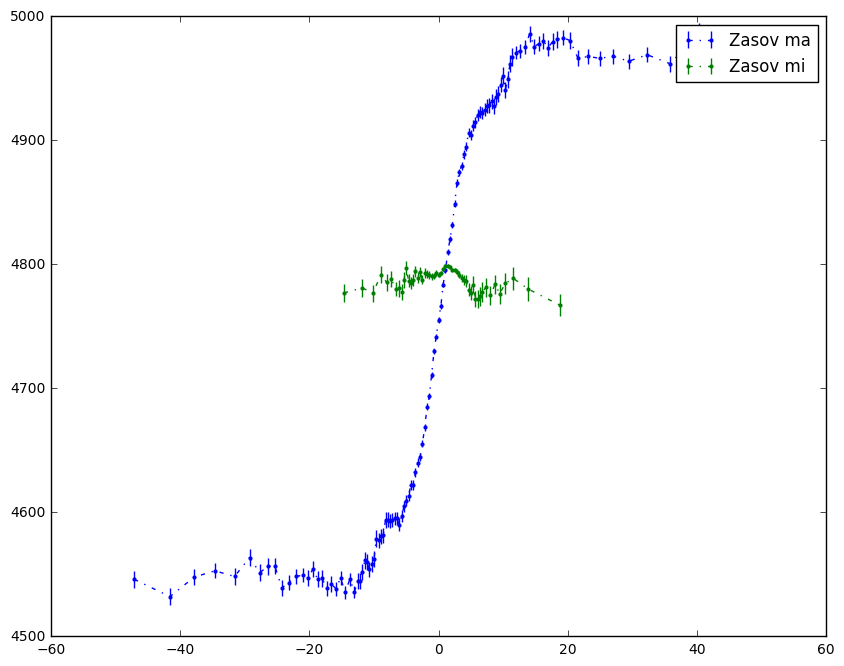

In [19]:
# Данные по звездной кинематике Засова 2012 вдоль большей полуоси, не исправленные за наклон 
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_ma.dat", float))

# Данные по звездной кинематике Засова 2012 вдоль малой полуоси, не исправленные за наклон 
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_mi.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Zasov ma")
plt.errorbar(r_mi, vel_mi, e_vel_mi, fmt='-.', marker='.', mew=0, label="Zasov mi")
plt.legend()
plt.show()

[]

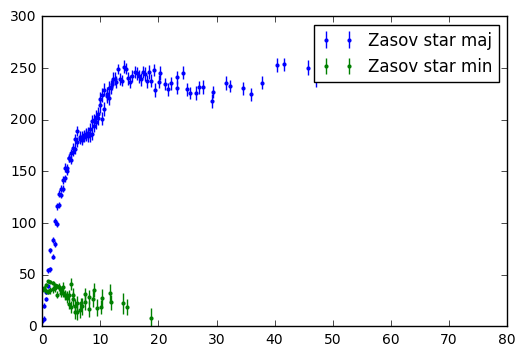

In [20]:
def incline_velocity(v, angle):
    return v / sin(angle * pi / 180)

# Переносит центр в (r0,v0) и перегибает кривую вращения, 
# а также исправляет за наклон если необходимо
def correct_rotation_curve(rdata, vdata, dvdata, r0, v0, incl):
    rdata_tmp = [abs(r-r0) for r in rdata]
    vdata_tmp = [incline_velocity(abs(v-v0), incl) for v in vdata]
    data = zip(rdata_tmp, vdata_tmp, dvdata)
    data.sort()
    return zip(*data)

b_vel = 4760

r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, b_vel, incl)
r_mi_b, vel_mi_b, e_vel_mi_b = correct_rotation_curve(r_mi, vel_mi, e_vel_mi,  0.0, b_vel, incl)

plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')
plt.errorbar(r_mi_b, vel_mi_b, yerr=e_vel_mi_b, fmt='.', marker='.', mew=0, label = 'Zasov star min', color='green')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend()
plt.plot()

TODO: подумать еще раз про малую полуось

TODO: добавить картинку Засова для сравнения

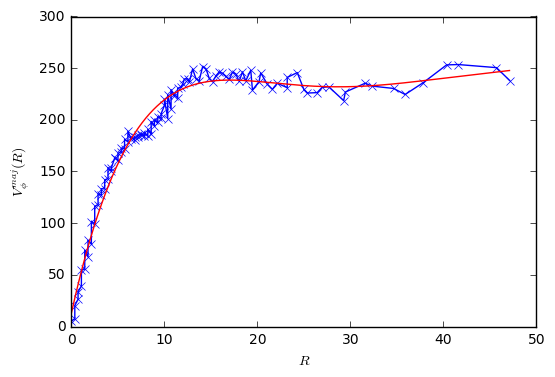

In [21]:
# poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))


plt.plot(r_ma_b, vel_ma_b, 'x-', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$')
plt.show()

In [22]:
%%time
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=11))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=11')

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=5')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter
spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=3700.)
plt.plot(test_points, spl(test_points), '-', label='spl s=3700')

# spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=4000., w=w(e_vel_b))
# plt.plot(test_points, spl(test_points), '-', label='spl s=4000 w^2')

plt.legend(loc='lower right')
# plt.ylim(0, 300)
plt.show()

Wall time: 1.69 s


C весами плохо получается, берем обычный достаточно гладкий сплайн.

In [23]:
star_approx = spl

### Дисперсии

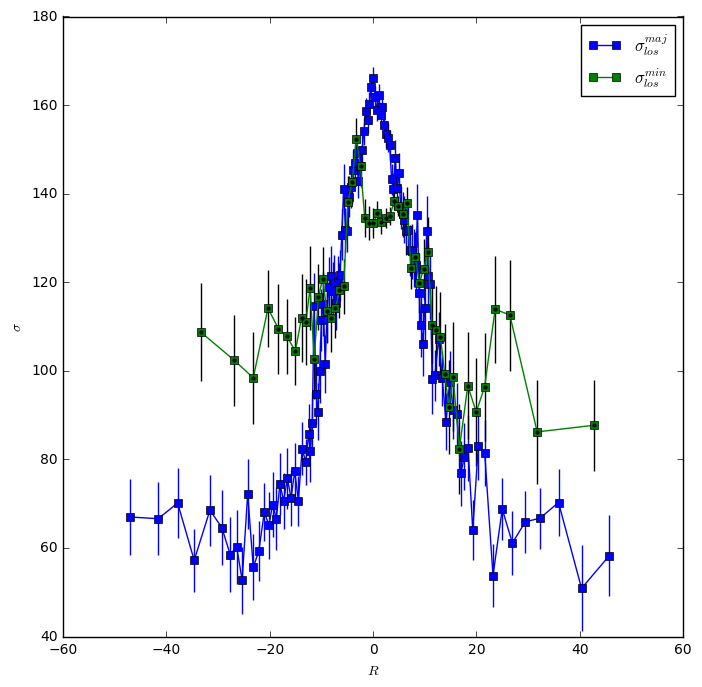

In [24]:
#TODO: свидетельство того, что надо раздвигать

# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

r_mi_extend = map(correct_min, r_mi)

fig = plt.figure(figsize=[8, 8])
plt.plot(r_ma, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_extend, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

In [25]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
sig_maj_data = sorted(zip(r_ma, sig_ma, e_sig_ma))
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
r_sig_ma, sig_ma, e_sig_ma = zip(*sig_maj_data) 

sig_min_data = sorted(zip(r_mi_extend, sig_mi, e_sig_mi))
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
r_sig_mi, sig_mi, e_sig_mi = zip(*sig_min_data) 

In [26]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=3000.)
sig_min_lim = max(r_sig_mi)

spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=6000.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_sig_ma)+15., 100)

In [27]:
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

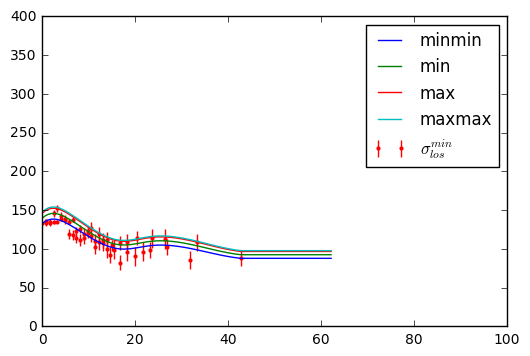

In [28]:
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

In [29]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

По большой:

In [30]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

Сравним major vs minor оценки:

In [31]:
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(50,300)
plt.xlim(0,100)
plt.show()

Видно, что оценки из разных осей не согласуются друг с другом.

## Данные по газу

### Кривая вращения

Газовая кривая, нужна для эпициклического приближения:

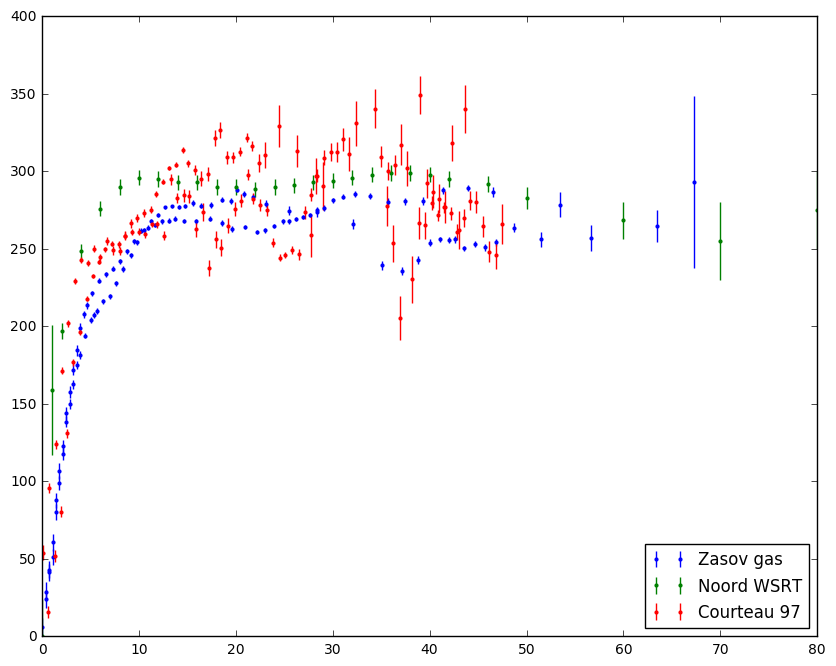

In [32]:
# Данные по кинематике газа Засова 2012 вдоль большой полуоси, не исправленные за наклон (они же Катков)
zasov_raw_data = np.loadtxt("v_gas_ma.dat", float)
r_g, vel_g, e_vel_g = zip(*zasov_raw_data)

# Данные по кинематике газа Noordermeer 2007 (исправлено за наклон)
wsrt_raw_data = np.loadtxt("v_gas_WSRT.dat", float)
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*wsrt_raw_data)

# Данные по кинематике газа Courteau 97 (не исправлено за наклон)
court_raw_data = np.loadtxt("v_gas_Court.dat", float)
r_court, vel_court, e_vel_court = zip(*court_raw_data)


r_g_b, vel_g_b, e_vel_g_b = correct_rotation_curve(r_g, vel_g, e_vel_g,  0.0, b_vel, incl)
r_c_b, vel_c_b, e_vel_c_b = correct_rotation_curve(r_court, vel_court, e_vel_court,  0.0, 0.0, incl)


fig = plt.figure(figsize=[10,8])
plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'Noord WSRT')
plt.errorbar(r_c_b, vel_c_b, yerr=e_vel_c_b, fmt='.', marker='.', mew=0, label = 'Courteau 97')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend(loc='lower right')
plt.show()

В целом достаточно неплохо согласуются, если Courteau усреднить

TODO: посмотреть, что именно за газ

Приближения: (пока будем приближать Засова)

TODO: сделать все точки вместе, больше данных чтоб

In [33]:
from scipy.optimize import curve_fit

fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_g_b, vel_g_b, deg=7))
test_points = np.linspace(min(r_g_b), max(r_g_b), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_g_b, vel_g_b, k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

def arctanlaw(x,m,c,d):
    return c*np.arctan(x/m) + d
#     return c*np.power(x,m) + d

coeff, _ = curve_fit(arctanlaw, r_g_b[:-1], vel_g_b[:-1])
m, c, d = coeff[0], coeff[1], coeff[2]
plt.plot(np.linspace(1., 100., 100), map(lambda l: arctanlaw(l, m,c,d), np.linspace(1., 100., 100)), '-', label='arctanlaw')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

plt.ylim(0, 350)
plt.legend(loc='lower right')
plt.show()

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

In [34]:
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')

def epicyclicFreq_real_(spl_gas, x, scale):
    '''продливаем дальше без производной на плато'''
    if x < 60.:
        return epicyclicFreq_real(spl_gas, x, scale)
    else:
        return sqrt(2)*arctanlaw(x, m,c,d)/(x*scale)
#     TODO: check scale multiplication
    
plt.plot(np.linspace(1., 100., 100), [epicyclicFreq_real_(gas_approx, x, scale) for x in np.linspace(1., 100., 100)], '-', label='contin')

plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 600)
plt.legend()
plt.show()

### Поверхностная плотность газа

Плотность HI:

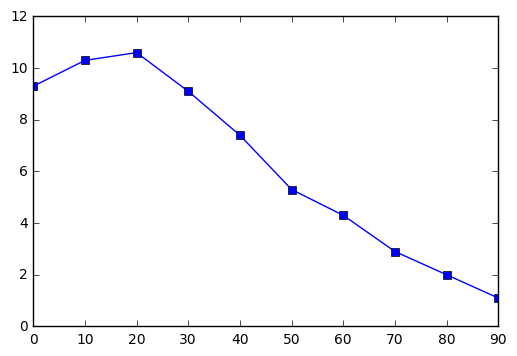

In [35]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-')
plt.show()

Газа оооочень много.

В работе https://ui.adsabs.harvard.edu/#abs/1998AJ....115..405L/abstract есть центральаня яркость в $CO$ (5.16) и при пересчете (если он правильный) получается примерно 16.5 в центре, что вполне нормально.

## Данные по фотометрии

В дипломе написана неправда - в диссератции есть эта галактика (не знаю, почему я писал только о статье с Hulst), причем аж три полосы: I, R, B.

In [36]:
all_photometry = []

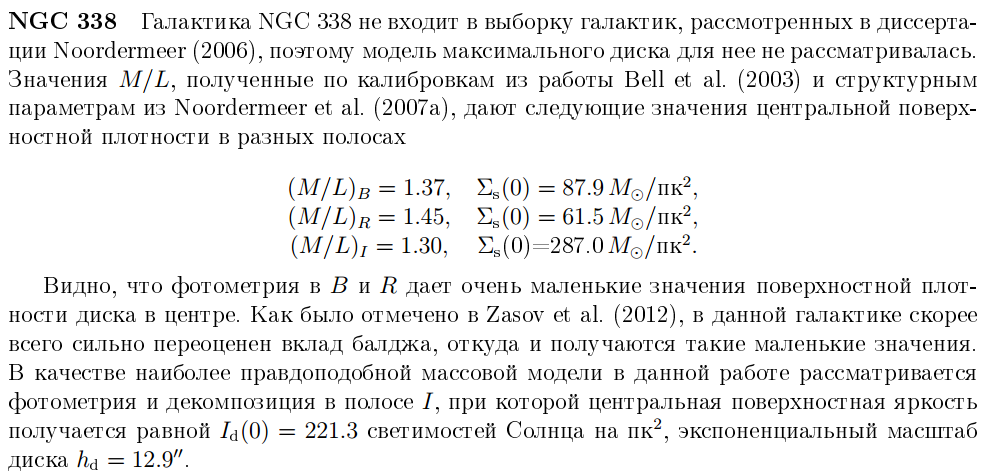

In [37]:
all_photometry = []
Image('diplom_cite_p34.png')

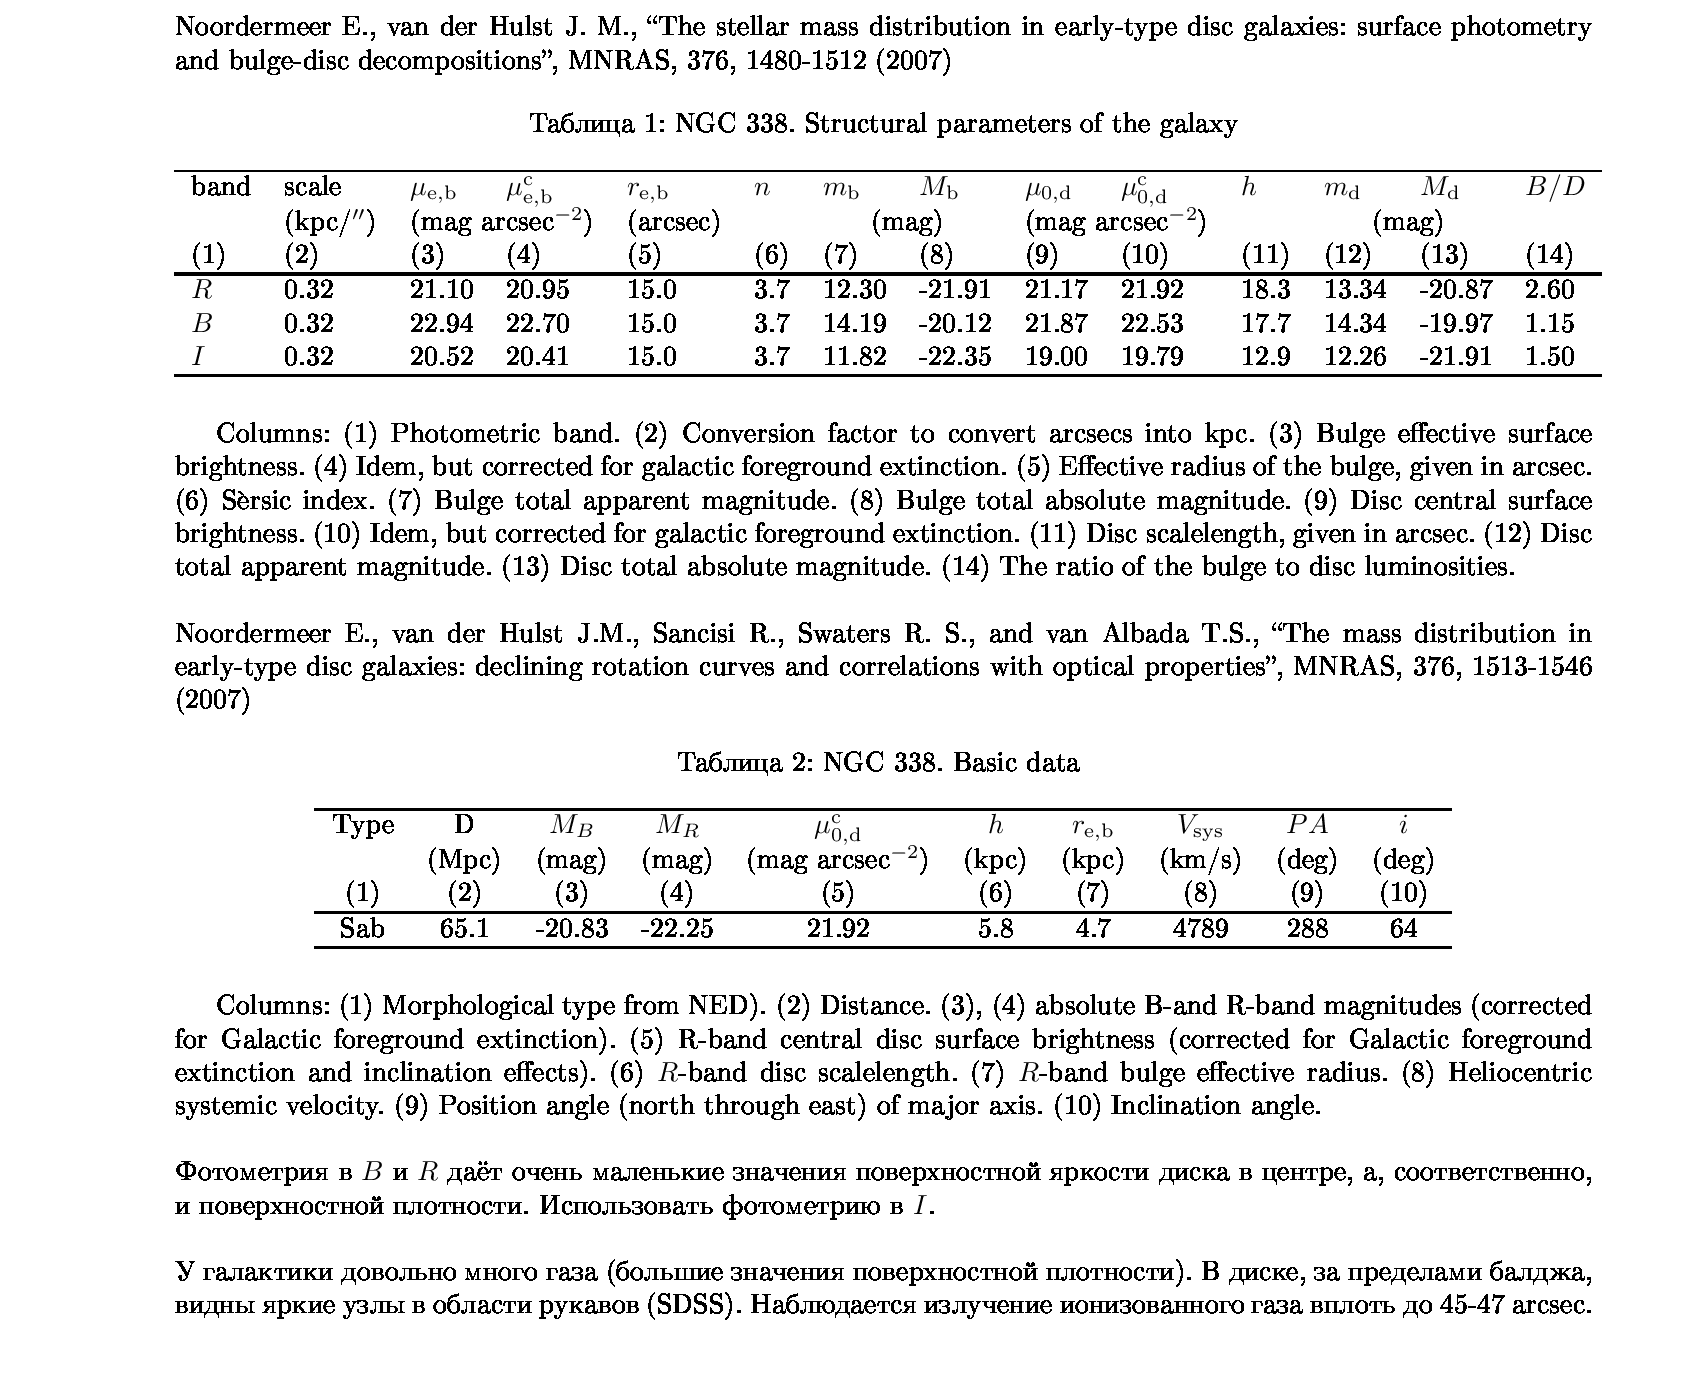

In [38]:
from wand.image import Image as WImage
img = WImage(filename='ngc338.pdf', resolution=200)
img[:, 200:1600]

In [39]:
M_R = -20.87 #13.34 в дипломе были относительные, что неверно
M_B = -19.97 #14.34

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [40]:
print 'I : {:2.2f}; B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'I', 'B-R'), 
                                                      bell_mass_to_light(M_B-M_R, 'B', 'B-R'), 
                                                      bell_mass_to_light(M_B-M_R, 'R', 'B-R'))

I : 1.15; B : 1.06; R: 1.24.


Брать надо скорректированные (они face-on и исправлены за поглощение):

In [41]:
# I-band
r_eff_I = 15.0
mu_eff_I = 20.52
n_I = 3.7
mu0d_I = 19.0
h_disc_I = 12.9

# I-band
mu_eff_Ic = 20.41
mu0d_Ic = 19.79

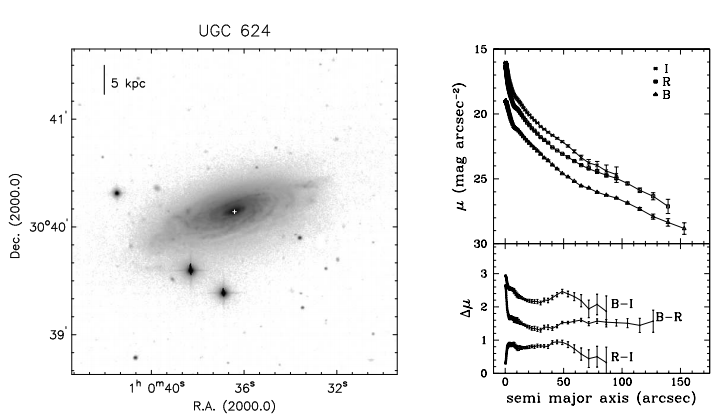

In [42]:
Image('noordermeer_data/n338_photom.png')

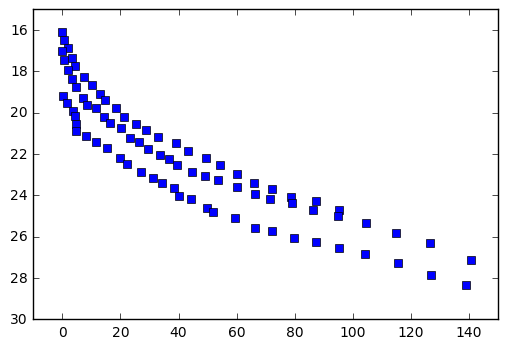

In [43]:
r_phot, mu_phot = zip(*np.loadtxt("noordermeer_data/n338_noord_photoIBR_p131.dat", float, delimiter=','))
plt.plot(r_phot, mu_phot, 's')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.show()

In [44]:
p_ = np.arange(0.1, 140., 0.1)
bulge_I = [mu_bulge(l, mu_eff=mu_eff_I, r_eff=r_eff_I, n=n_I) for l in p_]
disc_I = [mu_disc(l, mu0=mu0d_I, h=h_disc_I) for l in p_]
total_profile_I = total_mu_profile(bulge_I, disc_I)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, bulge_I, '-', label='bulge', color='red')
plt.plot(p_, disc_I, '-', label='disk', color='green')
plt.plot(p_, total_profile_I, '-', label='sum', color='m')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_Ic, r_eff=r_eff_I, n=n_I) for l in p_], 
                              [mu_disc(l, mu0=mu0d_Ic, h=h_disc_I) for l in p_]), '-', label='sum corr', color='#770000')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend()
plt.show()

In [45]:
# R-band
r_eff_R = 15.0
mu_eff_R = 21.10
n_R = 3.7
mu0d_R = 21.17
h_disc_R = 18.3

mu_eff_Rc = 20.95
mu0d_Rc = 21.92

In [46]:
# B-band
r_eff_B = 15.0
mu_eff_B = 22.94
n_B = 3.7
mu0d_B = 21.87
h_disc_B = 17.7

mu_eff_Bc = 22.70
mu0d_Bc = 22.53

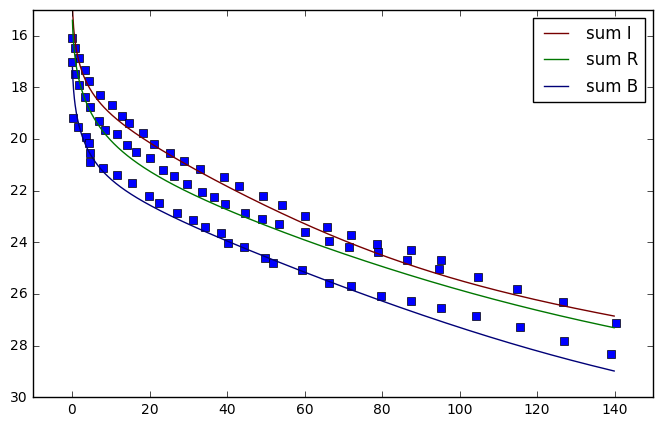

In [47]:
fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_I, r_eff=r_eff_I, n=n_I) for l in p_], 
                              [mu_disc(l, mu0=mu0d_I, h=h_disc_I) for l in p_]), '-', label='sum I', color='#770000')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend()
plt.show()

Отлично, похоже на правду. Массовые модели:

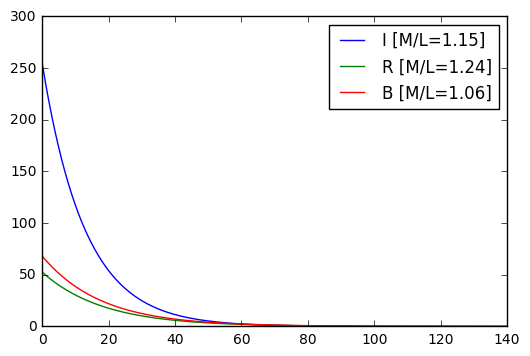

In [48]:
b_r_color = M_B-M_R

M_to_L_I = bell_mass_to_light(b_r_color, 'I', 'B-R')
surf_I = [surf_density(mu=mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), M_to_L=M_to_L_I, band='I') for l in p_]
plt.plot(p_, surf_I, '-', label='I [M/L={:2.2f}]'.format(M_to_L_I))

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

plt.legend()
plt.show()

Чуть поменьше, чем в дипломе, потому что взяли скорректированные за поглощение значения. 

TODO: почему стало меньше - аккуратнее

In [49]:
all_photometry.append(('Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_R, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R')))
all_photometry.append(('Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_B, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B')))
all_photometry.append(('Noorder I', r_eff_I, mu_eff_Ic, n_I, mu0d_Ic, h_disc_I, M_to_L_I, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), M_to_L=M_to_L_I, band='I')))

 К сожалению, больше фотометрии найти не удалось. Только в http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1996ApJS..103..363C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf есть наметки в 'r' полосе:

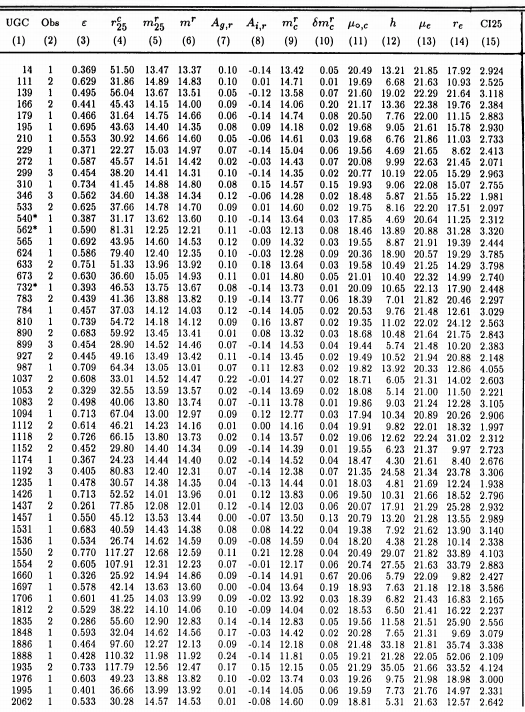

In [50]:
Image('624_decomp.png')

In [51]:
show_all_photometry_table(all_photometry, scale)

+------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------+
|      | Name      |   r_eff |   mu_eff |    n |   mu0_d |   h_disc |   M/L | M_d/M_sun   |   Sigma_0 |
|------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------|
| 0.00 | Noorder R |   15.00 |    20.95 | 3.70 |   21.92 |    18.30 |  1.24 | 9.43E+09.   |        53 |
| 1.00 | Noorder B |   15.00 |    22.70 | 3.70 |   22.53 |    17.70 |  1.06 | 1.14E+10.   |        68 |
| 2.00 | Noorder I |   15.00 |    20.41 | 3.70 |   19.79 |    12.90 |  1.15 | 2.27E+10.   |       255 |
+------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------+


### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

In [52]:
fig = plt.figure(figsize=[10,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

for photom in all_photometry:
    plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), '--', label=photom[0])


plt.ylim(0, 300)
plt.xlim(0, 100)
plt.legend(loc='best')
plt.show()

Очевидно они все достаточно плохи (я бы сказал, что $I$) чуть получше остальных, отринуть никакую нельзя.

## Зоны звездообразования

Вроде бы есть в XUV изображение в одной из статей. Но в целом можно рассудить так - SDSS изображение имеет радиус 200 секунд и там видно примерно до 50" (на меньшей картинке было лучше видно). 

sdss http://skyserver.sdss.org/dr12/en/tools/explore/summary.aspx?ra=015.151708&dec=+30.668919

dr9 http://cas.sdss.org/dr9/en/tools/explore/obj.asp?id=1237680286530732043, масштаб 0.39612 "/pix => размер картинки 200 секунд

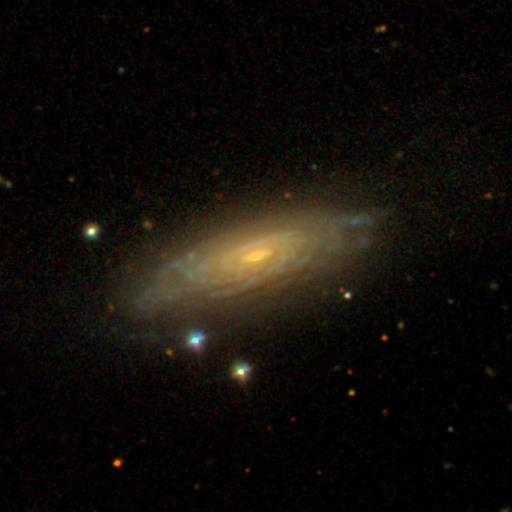

In [53]:
Image('ngc338_SDSS.jpeg', width=400)

In [54]:
def plot_SF(ax):
    ax.plot([5., 60.], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

(0, 200)

## Неустойчивость

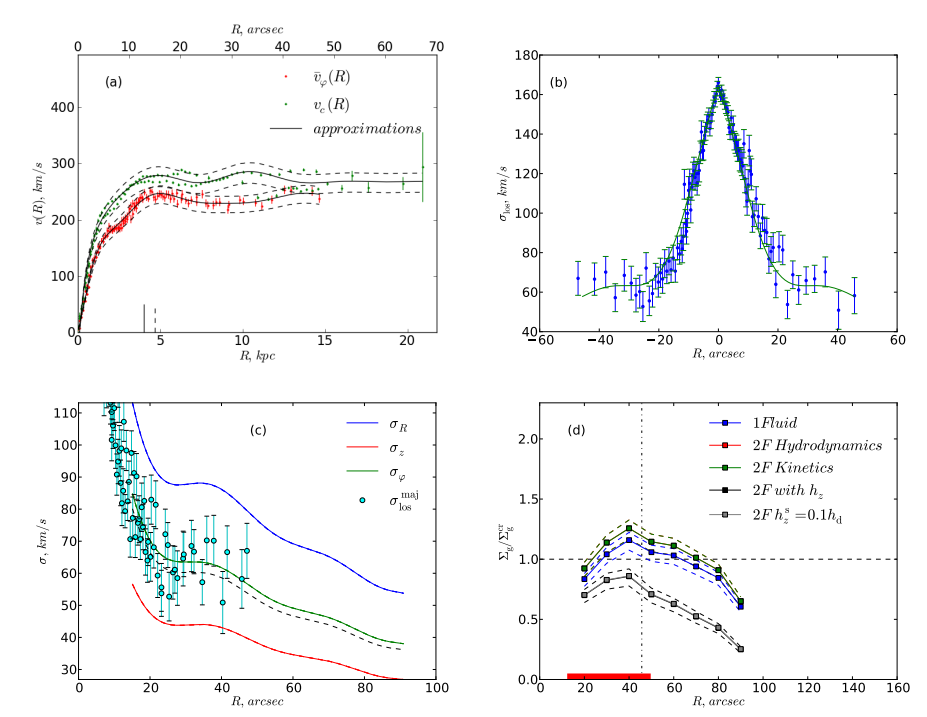

In [55]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [56]:
sound_vel = 6.  #скорость звука в газе, км/с
data_lim = max(max(r_sig_ma), max(r_sig_mi)) #где заканчиваются данные

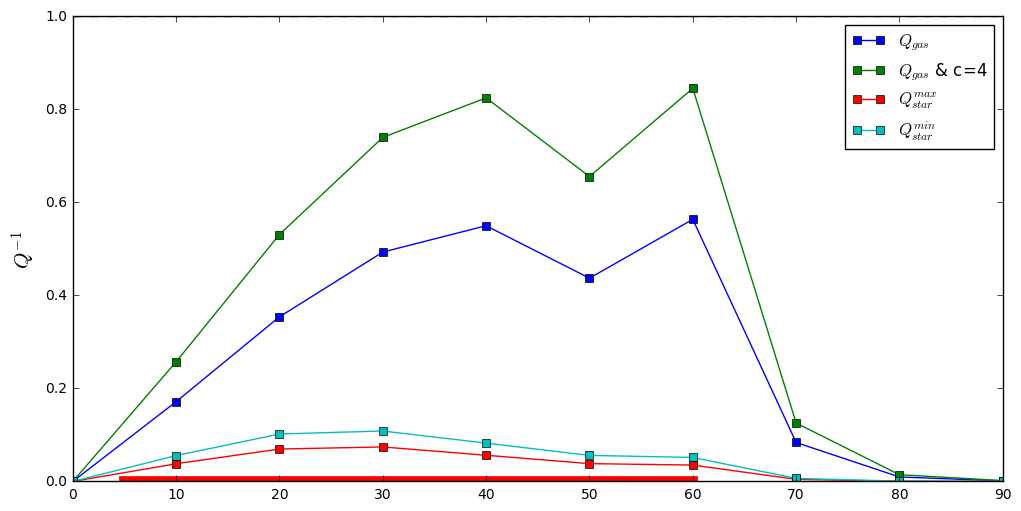

In [57]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens),
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.show()

Почему-то меньше чем в дипломе, даже с учетом 1.6 (вот c=4 похоже).

**НЕ ИСПРАВЛЕНО ЗА 1.6!** Так и должно быть.

Попробуем с продолженной эпицикл. частотой:

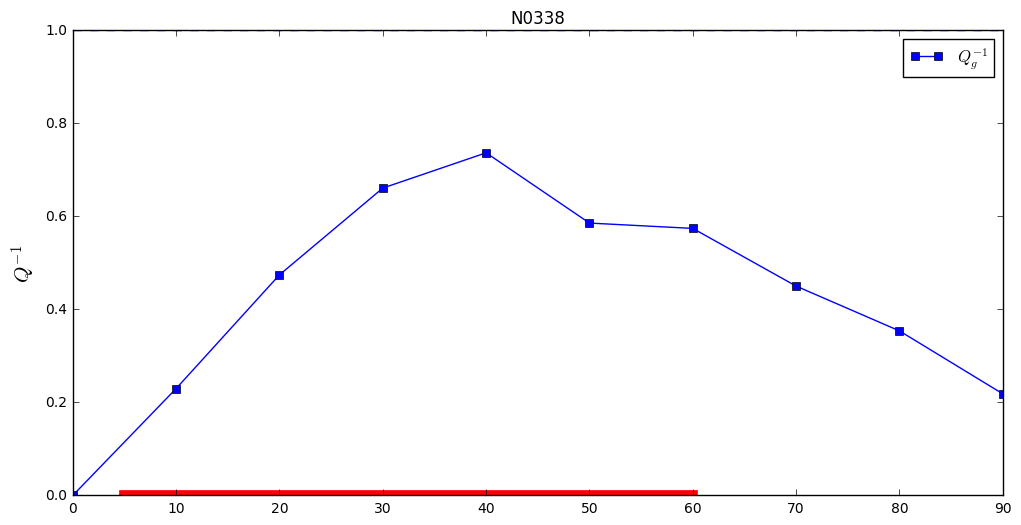

In [58]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=He_coeff*l[1]) for l in 
                    zip([epicyclicFreq_real_(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{g}^{-1}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.title(name)
# plt.savefig('..\\..\pics\\instab_spirals\\'+name+'_spiral'+'.png', format='png', bbox_inches='tight')
plt.show()

Видно, что падение стало более плавным.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

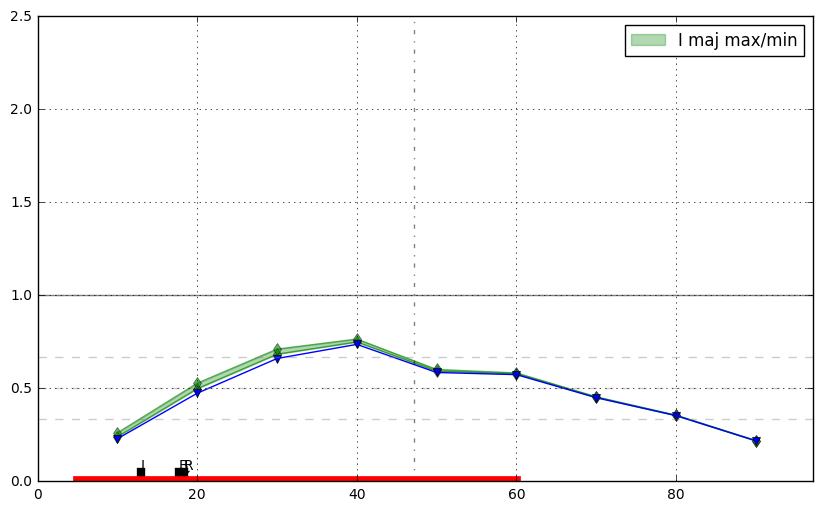

In [59]:
total_gas_data = zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

# Конец

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


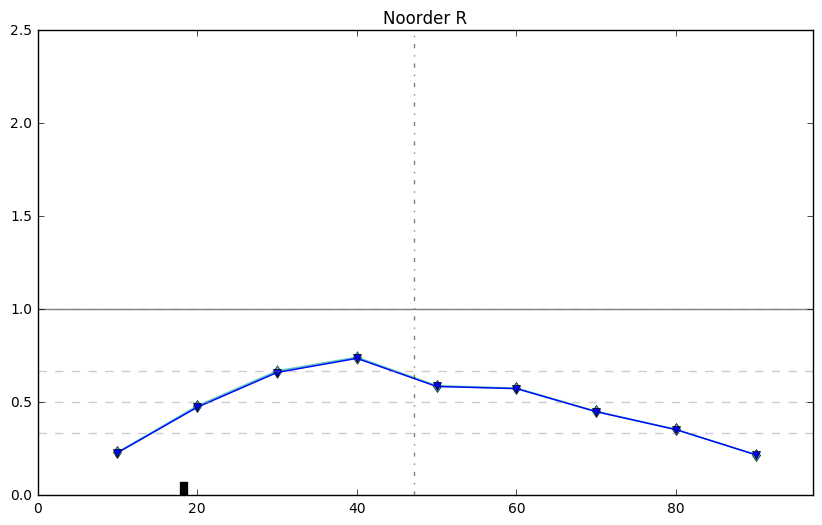

In [60]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real_, gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [61]:
anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=2)

In [62]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Самый максимальный диск

Существует ограничение на максимальный диск в ~0.85 (изотермическое гало) и на субмаксимальный в 0.55-0.6 (NFW гало). Попробуем дотянуть фотметрию до максимальных дисков и посмотрим, как изменятся M/L (скорость зависит как корень из M/L):

Noorder R      : M/L was 1.24 and for max it equal 20.91, for submax equal 10.42
Noorder B      : M/L was 1.06 and for max it equal 14.02, for submax equal 6.99
Noorder I      : M/L was 1.15 and for max it equal 6.23, for submax equal 3.10


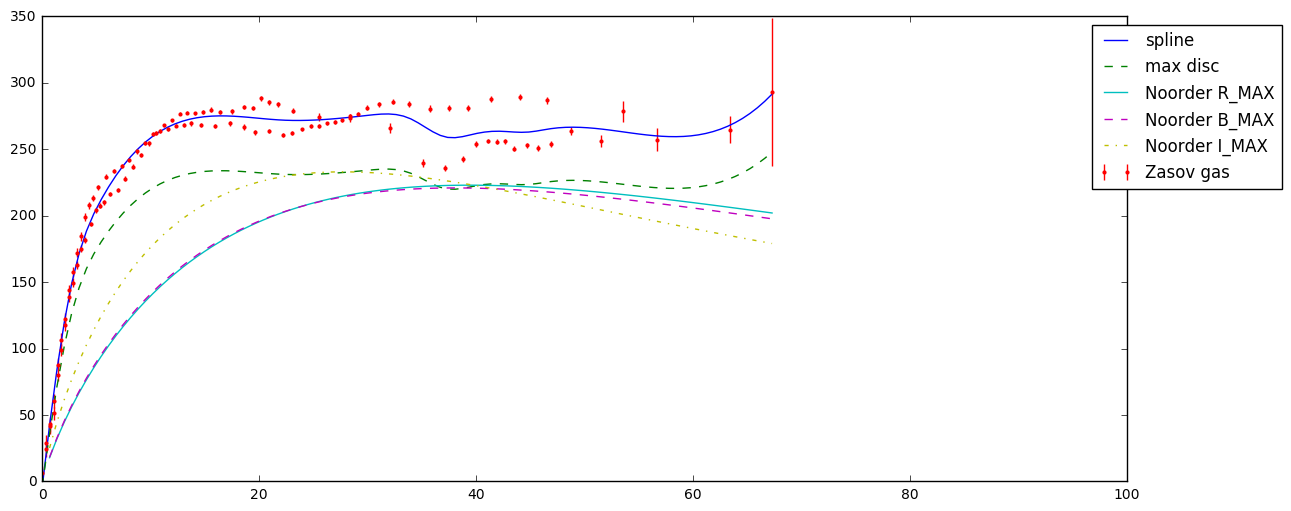

In [63]:
fig = plt.figure(figsize=[14,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')
plt.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc')
# plt.plot(test_points, 0.6*spl_gas(test_points), '--', label='submax disc')
# plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
# plt.plot(r, vel, '.', label = 'Noord thesis')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

max_coeffs = {}

for photom in all_photometry:
    disc_max = 2.2*photom[5]
    max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    
    plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0] + '_MAX')
    
    print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
    max_coeffs[photom[0]] = [max_coeff**2, submax_coeff**2]


plt.ylim(0, 350)
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.show()

Только $I$ выглядит не превыщающим, для $B$ можно взять субмаксимальный.

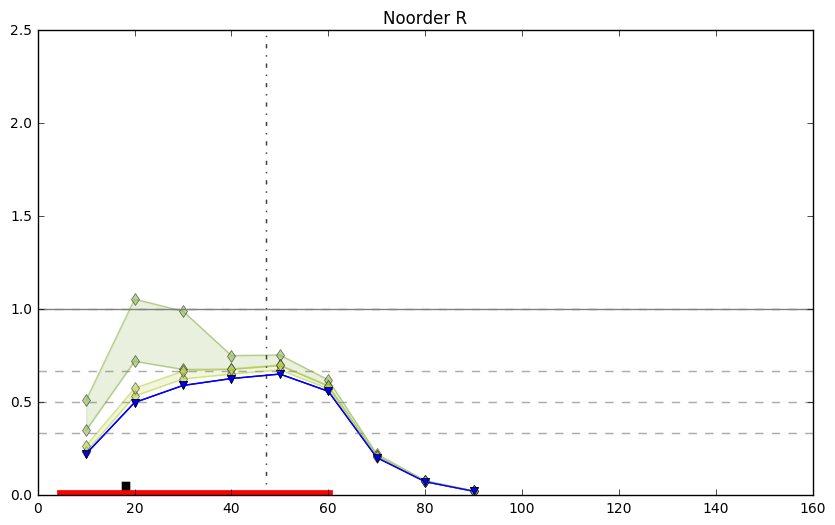

In [64]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:],
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:], 
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    ax.set_xlim(0., 160.)
    plot_SF(ax)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [65]:
anim.save('..\\..\pics\\'+name+'_MAXDISCS.gif', writer='imagemagick', fps=1)

In [66]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Оценки с молекулярным диском

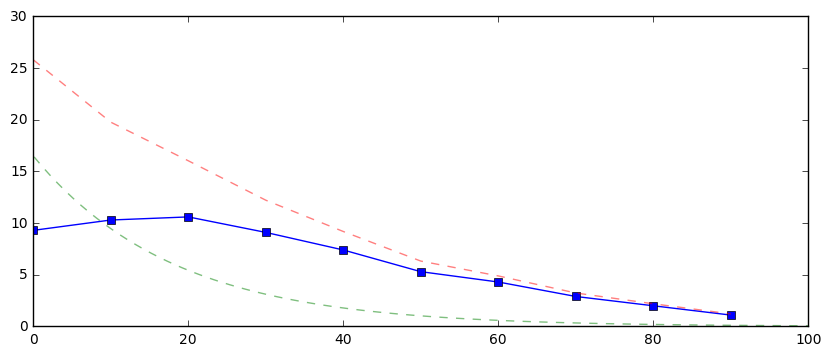

In [67]:
fig = plt.figure(figsize=[10, 4])

def y_interp_(r, h):
    return 16.5*np.exp(-r/h)

points = np.linspace(0.1, 100., 100.)

plt.plot(r_g_dens, gas_dens, 's-')

plt.plot(points, y_interp_(points, 18.),  '--', alpha=0.5)
plt.plot(r_g_dens, map(lambda l: y_interp_(l[0], 18.) + l[1], zip(r_g_dens, gas_dens)),  '--', alpha=0.5)
plt.show()

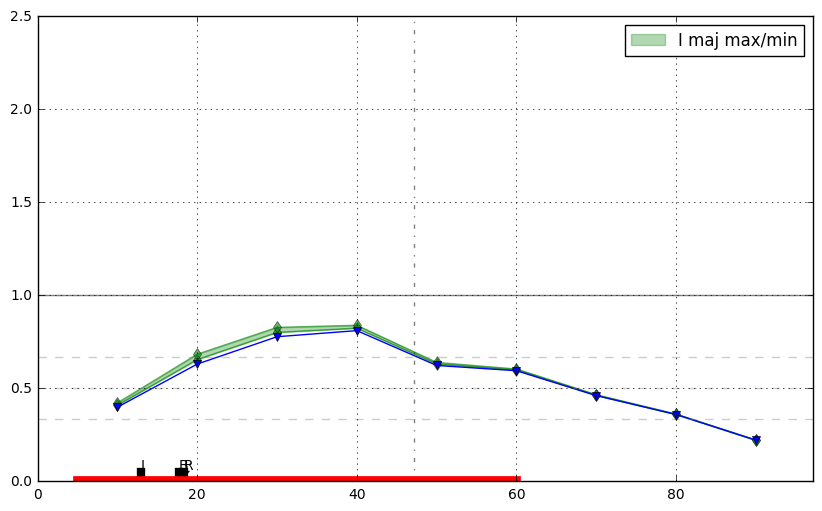

In [68]:
fig = plt.figure(figsize=[10, 6])

total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], 12.9) + l[1]) for l in zip(r_g_dens, gas_dens)])

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

Поднялось повыше в центре.
Для B и R:

In [69]:
fig = plt.figure(figsize=[10, 6])

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), M_to_L_R, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), M_to_L_R, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

И оценки с максимальным диском:

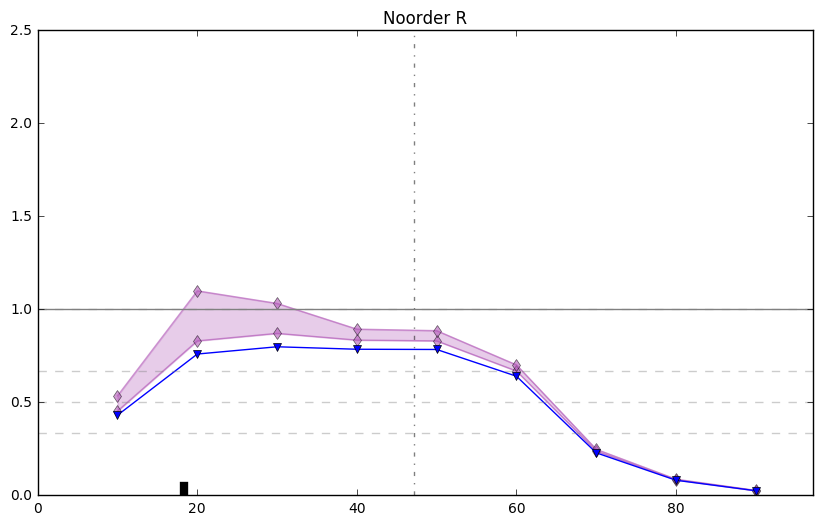

In [70]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [71]:
anim.save('..\\..\pics\\'+name+'_molec_MAX.gif', writer='imagemagick', fps=1)

In [72]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Картинка 

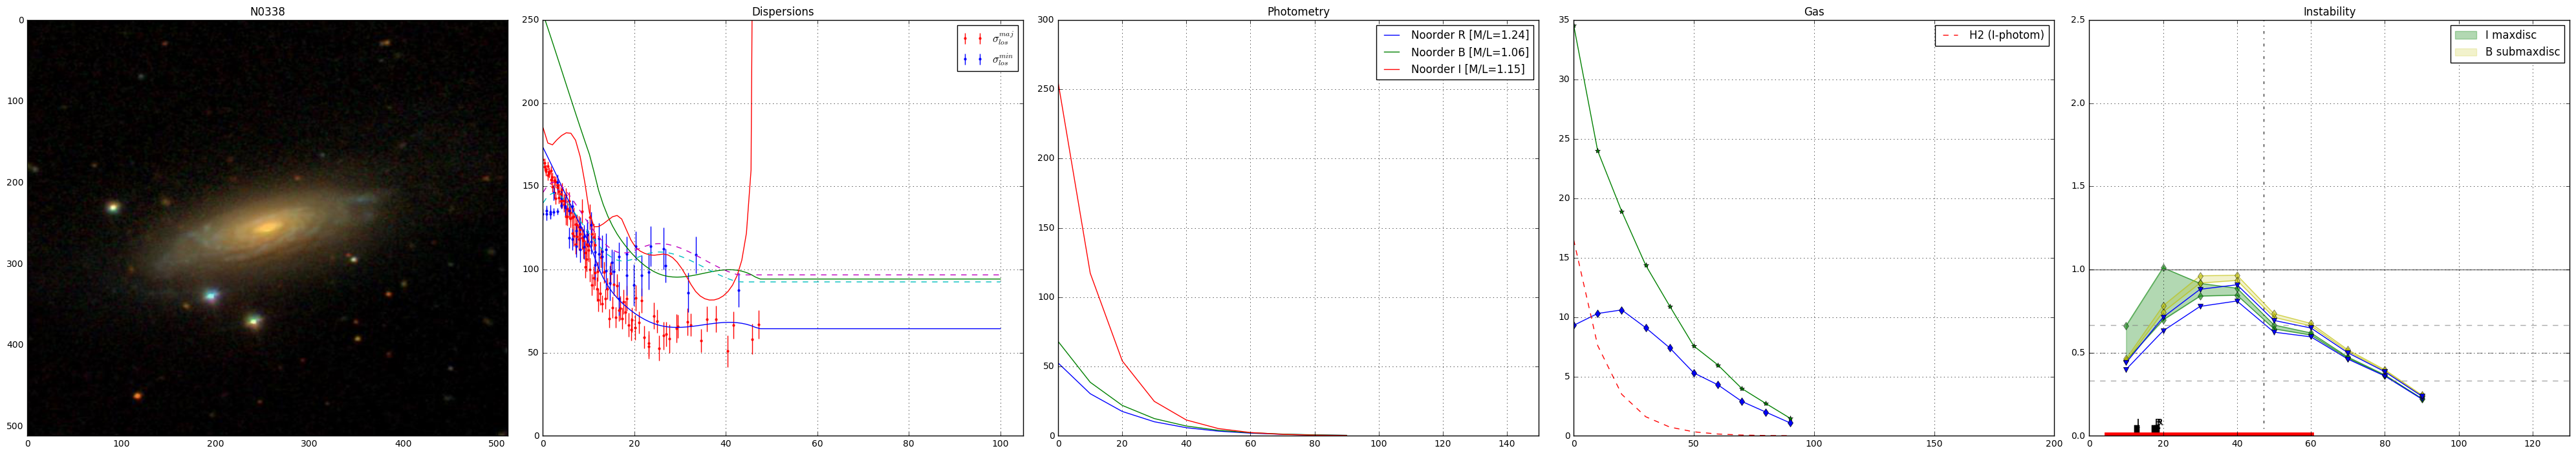

In [78]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('ngc338_SDSS.jpeg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='b', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)], '*-')
    axes[3].plot(r_g_dens, [y_interp_(l, h_disc_I) for l in r_g_dens], '--', label='H2 (I-photom)')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=gas_approx, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maxdisc')
    
    plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=gas_approx, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B'), 
                  data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales, label='B submaxdisc')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight')
    plt.show()
    
save_model_plot(summary_imgs_path)

Ниже все неточно, нужно проверять нормировки и т.д.

### Другие механизмы

Schaye (2004), 'cold gas phase':
$$\Sigma_g > 6.1 f_g^{0.3} Z^{-0.3} I^{0.23}$$
или при constant metallicity of 0.1 $Z_{sun}$ and interstellar flux of ionizing photons 10^6 cm−2 s−1:
$$\Sigma_g > 6.1 \frac{\Sigma_g}{\Sigma_g + \Sigma_s}$$

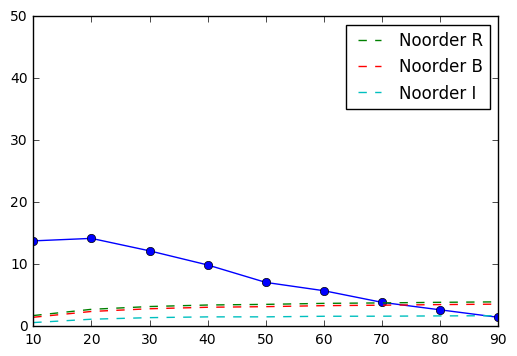

In [118]:
plt.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')

for photom in all_photometry:
    dens_s04 = [Sigma_crit_S04(l[0], l[1], photom[7]) for l in total_gas_data]
    plt.plot(zip(*total_gas_data)[0], dens_s04, '--', label=photom[0])

plt.legend()
plt.ylim(0, 50.)
plt.show()

Видимо почти везде неустойчиво.

Hunter et al (1998), 'competition with shear' according to Leroy: 
$$\Sigma_A = \alpha_A\frac{\sigma_g A}{\pi G}$$

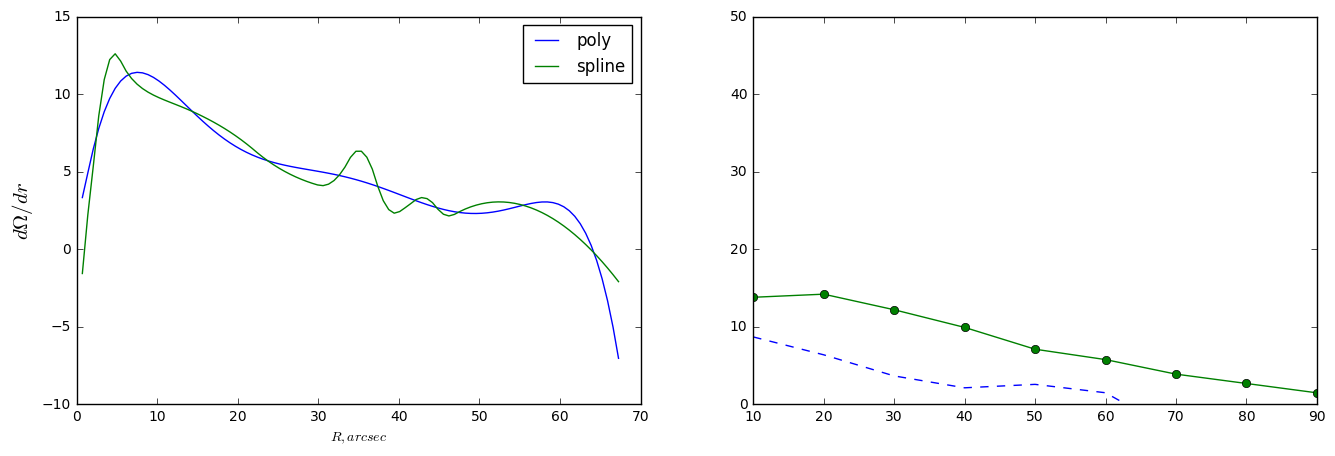

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[16, 5])
ax1.plot(test_points, [oort_a(x, gas_approx) for x in test_points], '-', label='poly')
ax1.plot(test_points, [oort_a(x, spl_gas) for x in test_points], '-', label='spline')
ax1.set_xlabel('$R, arcsec$')
ax1.set_ylabel('$d\Omega/dr$', fontsize=15)
ax1.legend()

dens_A = [Sigma_crit_A(l, spl_gas, 2., 6.) for l in zip(*total_gas_data)[0]]
ax2.plot(zip(*total_gas_data)[0], dens_A, '--')
ax2.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')
ax2.set_ylim(0, 50.)

plt.show()

Непонятно, судя по всему тоже везде неустойчиво.

### Дисперсии из АD

Интересный вариант для тех галактик, в которых есть данные по газу. Разница между скоростями вращения звезд и газа вокруг центра галактики называется ассиметричным сдвигом и описывается следующим уравнением (Binney & Tremaine 1987): $$v_{\mathrm{c}}^{2}-\bar{v}_{\varphi}^{2}=\sigma_{R}^{2}\left(\frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}-1-\frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}-\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}\right)\,$$
Отношение ${\displaystyle \frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}}$ знаем из соответствующего уравнения. Поймем, как в этом выражении вычисляется логарифмическая производная ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$. Если отношение массы к светимости принять постоянной вдоль радиуса величиной, то в производной ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$ можно использовать поверхностную яркость звездного диска вместо поверхностной плотности $\Sigma_{\mathrm{s}}$ в тех полосах, которые трассируют старое звездное население. Это означает, что логарифмическая производная должна быть заменена отношением $-{\displaystyle \frac{R}{h_{\text{d}}}}\,,$ где $h_{\text{d}}$ --- экспоненциальный масштаб диска.
Вычисление $\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}$ из кинематического масштаба равно $-\frac{2R}{h_{kin}}$

In [120]:
def sigR2Evaluation(R, h, h_kin, p_star, p_gas):
    '''Вычисление sigmaR^2 в случае, если уже известен кинетический масштаб.'''
    return (p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin )

def asymmetricDriftEvaluation(r_pc, h, path, p_star, p_gas, upperLimit):
    '''Вычисление ассиметричного сдвига на основе формулы (21) из методички. Логарифмическая производная от радиальной
     дисперсии скоростей считается как предложено в статье Silchenko et al. 2011, экспонентой фитируется для R > 1h.
     Сами значения считаются только для тех точек, есть данные и по газу и по звездам.'''
    eps = 0.1
    h_kin = 0
    h_kin_next = h
    sigR2 = []
    upper = upperLimit
    r_gt_1h = filter(lambda x: x > h and x <= upper, r_pc)
    expfit = poly1d(1)

    h_disc = h

    print '#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = ' + str(eps) + ' starts.'
    while(abs(h_kin - h_kin_next) > eps):
        h_kin = h_kin_next
        sigR2[:] = []
        for R in r_gt_1h:
            sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))
        sigR2 = map(math.log, sigR2)
        expfit = poly1d(polyfit(r_gt_1h, sigR2, deg=1))
        h_kin_next = (-1 / expfit.coeffs[0])
        print '#!!!!!!!!!!!!# Next approx h_kin =', h_kin_next

    h_kin = h_kin_next
    sigR2[:] = []
    for R in r_pc:
        sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))

    sigR20 = math.exp(expfit.coeffs[1])
#     rexp_sigR2 = evalStartExp(r_pc, sigR2, lambda x: sigR20 * math.exp(-x / h_kin))
    return sigR20, h_kin, [sigR2Evaluation(R, h, h_kin, p_star, p_gas) for R in r_pc]

sigR20, h_kin, sigR2 = asymmetricDriftEvaluation(r_sig_ma, 18., '', star_approx, spl_gas, sig_maj_lim)

#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = 0.1 starts.
#!!!!!!!!!!!!# Next approx h_kin = 14.856759297
#!!!!!!!!!!!!# Next approx h_kin = 15.0412765167
#!!!!!!!!!!!!# Next approx h_kin = 15.0295676634


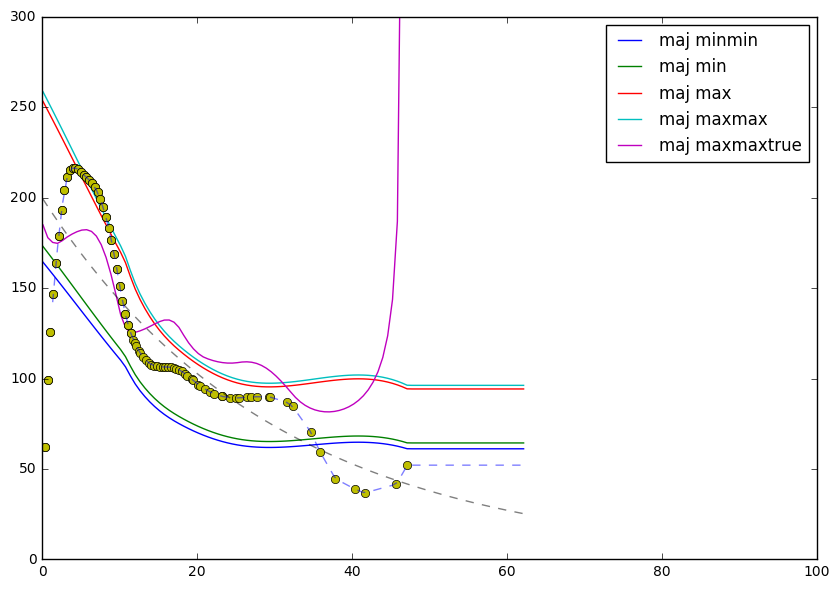

In [121]:
import scipy.interpolate
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(r_sig_ma, np.sqrt(sigR2), 'o')
plt.plot(points, map(lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), points),  '--', alpha=0.5)

y_interp = scipy.interpolate.interp1d(r_sig_ma, np.sqrt(sigR2))

@flat_end(sig_maj_lim)
def y_interp_(r):
    return y_interp(r)

plt.plot(points[2:], map(y_interp_, points[2:]),  '--', alpha=0.5)

plt.legend()
plt.ylim(0,300)
plt.xlim(0,100)
plt.show()

Довольно неплохо кстати.

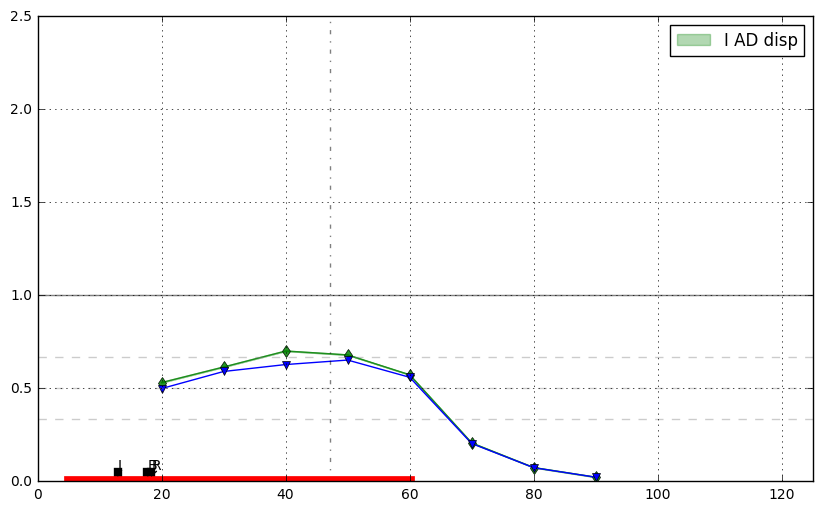

In [122]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data[1:], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=y_interp_, 
              sigma_min=y_interp_, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I AD disp')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.xlim(0., 125)
plt.show()

Если брать экспонентой:

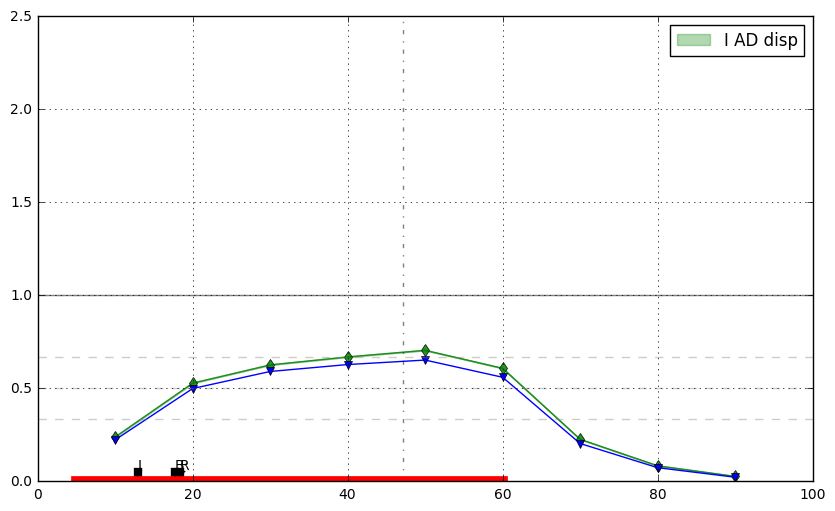

In [123]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), 
              sigma_min=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)),              
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I AD disp')

plt.xlim(0., 100.)
plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

Ничего особо не поменялось.

### Экспоненциальные оценки H2

В работах van der Hulst (2016) и Bigiel, Blitz (2012) есть экспоненциальные соотношения для H2+HI (см. заметки). 

Можно попробовать использовать это для оценки молекулярной компоненты газа:

In [124]:
r25 = h_disc_B*(25. - mu0d_B)/1.0857
r25, h_disc_B, (25. - mu0d_B)/1.0857

(51.02790826195079, 17.7, 2.8829326701667117)

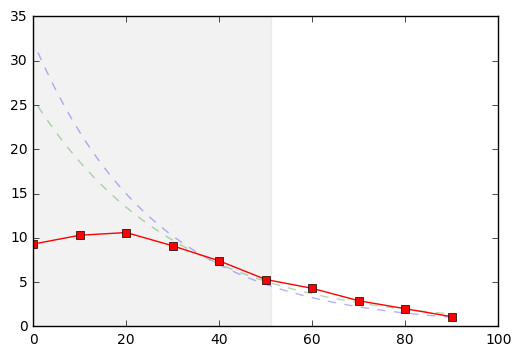

In [125]:
from scipy.optimize import curve_fit

def func1(x, a):
    return a * np.exp(-1.95 * x/r25)

def func2(x, a):
    return a * np.exp(-1.65 * x/r25)

popt, pcov = curve_fit(func1, r_g_dens[3:], gas_dens[3:])
points_ = np.linspace(1., max(r_g_dens), 100.)
plt.plot(points_, func1(points_, *popt), '--', alpha=0.3)

popt, pcov = curve_fit(func2, r_g_dens[3:], gas_dens[3:])
points_ = np.linspace(1., max(r_g_dens), 100.)
plt.plot(points_, func2(points_, *popt), '--', alpha=0.3)

plt.plot(r_g_dens, gas_dens, 's-')
plt.xlim(0, 100)
foreground_zebra(plt.gca(), r25, 0.1)
plt.show()

1.49037576946


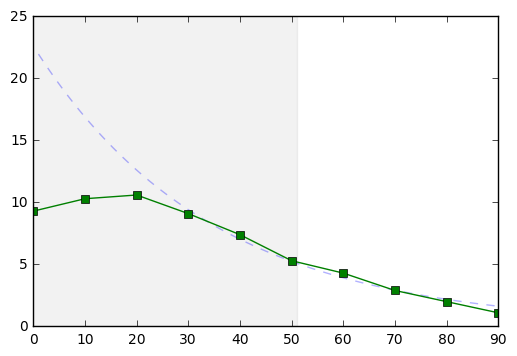

In [126]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

popt, pcov = curve_fit(func, r_g_dens[3:], gas_dens[3:])
print popt[1]
plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.show()

In [127]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

for i in range(2, len(r_g_dens)-5):
    popt, pcov = curve_fit(func, r_g_dens[i:], gas_dens[i:])
    print popt[1]
    plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.ylim(0, 26.)
plt.show()

1.30919086677
1.49037576946
1.65418924277


### Дисперсии газа

Что будет, если взять более нагретый и реалистичный профиль газа (как тут https://arxiv.org/pdf/1701.02138.pdf) - насколько станет устойчивее?

51.027908262


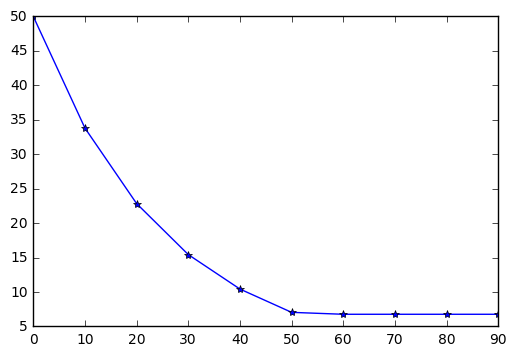

In [84]:
r25 = h_disc_B*(25. - mu0d_B)/1.0857
print r25
plt.plot(r_g_dens, [50*np.exp(-2*l/r25) if l < r25 else 50*np.exp(-2.) for l in r_g_dens], '*-');

In [85]:
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=[50*np.exp(-2*l/r25) if l < r25 else 50*np.exp(-2.) for l in r_g_dens[1:]], scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

### Сравнение с Romeo Falstad 2013

In [79]:
romeo_min = []
for r, g in zip(r_g_dens, gas_dens):
    rom, _ = romeo_Qinv(r=r, epicycl=epicyclicFreq_real, sound_vel=11., sigma_R=sig_R_maj_max, 
           star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), HI_density=He_coeff*g, CO_density=He_coeff*y_interp_(r, h_disc_R), 
                     alpha=0.3, scale=scale, gas_approx=spl_gas)
    romeo_min.append(rom)
    if _ == 'star':
        color = 'g' 
    elif _ == 'HI':
        color = 'b'
    else:
        color = 'm'
    plt.scatter(r, rom, 10, marker='o', color=color)


invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data_[1:], 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_max,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))


romeo_max = []
for r, g in zip(r_g_dens, gas_dens):
    rom, _ = romeo_Qinv(r=r, epicycl=epicyclicFreq_real, sound_vel=11., sigma_R=sig_R_maj_min, 
           star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), HI_density=He_coeff*g, CO_density=He_coeff*y_interp_(r, h_disc_R), 
                     alpha=0.7, scale=scale, gas_approx=spl_gas)
    romeo_max.append(rom)
    if _ == 'star':
        color = 'g' 
    elif _ == 'HI':
        color = 'b'
    else:
        color = 'm'
    plt.scatter(r, rom, 10, marker = 'd', color=color)


invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data_[1:], 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))


plot_Q_levels(plt.gca(), [1., 1.5, 2., 3.])
plt.xlim(0)
plt.ylim(0)
plt.gca().legend([matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='g', mec='none', marker='o'), 
                  matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='b', mec='none', marker='o'), 
                  matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='m', mec='none', marker='o')], 
                 ['star', 'HI', 'H2'], numpoints=1, markerscale=1, loc='upper right') #add custom legend
plt.title('RF13: major component')
plt.show()

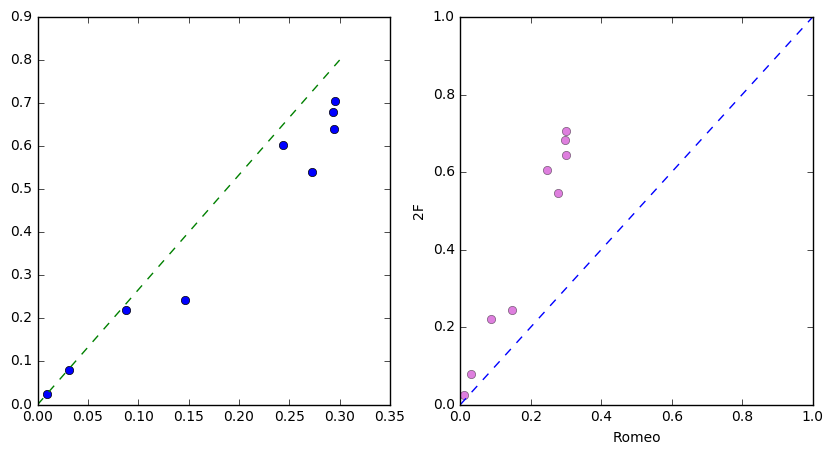

In [80]:
fig = plt.figure(figsize=[10, 5])
ax = plt.subplot(121)
ax.plot(romeo_min[1:], invQeff_min, 'o')
ax.plot(ax.get_xlim(), ax.get_ylim(), '--')
ax = plt.subplot(122)
ax.plot(romeo_max[1:], invQeff_max, 'o', color='m', alpha=0.5)
plt.xlabel('Romeo')
plt.ylabel('2F')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
ax.plot(ax.get_xlim(), ax.get_ylim(), '--');

In [81]:
zip(romeo_min[1:], invQeff_min)

[(0.1458861705134008, 0.24177247038684097),
 (0.272527944912552, 0.54083806462655426),
 (0.29421398685428229, 0.63944106666464995),
 (0.29298687612820479, 0.6782239557103672),
 (0.29526083061337727, 0.70395046883894996),
 (0.24346311677334223, 0.60337763674036293),
 (0.087348426024958084, 0.21953803712014852),
 (0.031252713374504977, 0.079646789960767891),
 (0.0096238099998892657, 0.024431829801964709)]

In [82]:
zip(romeo_max[1:], invQeff_max)

[(0.14745047076759643, 0.24323205603766357),
 (0.27732359762676895, 0.54535584164825224),
 (0.29906960397811494, 0.64402973691816123),
 (0.29636185437160728, 0.6813970235040695),
 (0.2984204228358166, 0.70692671105617633),
 (0.24539795445216503, 0.60519735114426176),
 (0.087953056409705979, 0.22010637936032551),
 (0.031436945986597728, 0.079819872912516104),
 (0.0096832988362852892, 0.024487726651234214)]

In [83]:
plt.plot(r_g_dens[1:], [l[1]/l[0] for l in zip(romeo_min[1:], invQeff_min)], 'o-')
plt.plot(r_g_dens[1:], [l[1]/l[0] for l in zip(romeo_max[1:], invQeff_max)], 'o-', color='m', alpha=0.5)
plt.xlabel('R')
plt.ylabel('[2F]/[Romeo]');

Все равно отношение больше и влияние звезд только указано, хотя тут явно основной вклад от газа.

Сравнение с Romeo Falstad 2013 для тонкого диска:

In [88]:
romeo_min = []
for r, g in zip(r_g_dens, gas_dens):
    rom, _ = romeo_Qinv_thin(r=r, epicycl=epicyclicFreq_real, sound_vel=11., sigma_R=sig_R_maj_max, 
           star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), HI_density=He_coeff*g, CO_density=He_coeff*y_interp_(r, h_disc_R), 
                     alpha=0.3, scale=scale, gas_approx=spl_gas)
    romeo_min.append(rom)
    if _ == 'star':
        color = 'g' 
    elif _ == 'HI':
        color = 'b'
    else:
        color = 'm'
    plt.scatter(r, rom, 10, marker='o', color=color)


invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data_[1:], 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_max,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))


romeo_max = []
for r, g in zip(r_g_dens, gas_dens):
    rom, _ = romeo_Qinv_thin(r=r, epicycl=epicyclicFreq_real, sound_vel=11., sigma_R=sig_R_maj_min, 
           star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), HI_density=He_coeff*g, CO_density=He_coeff*y_interp_(r, h_disc_R), 
                     alpha=0.7, scale=scale, gas_approx=spl_gas)
    romeo_max.append(rom)
    if _ == 'star':
        color = 'g' 
    elif _ == 'HI':
        color = 'b'
    else:
        color = 'm'
    plt.scatter(r, rom, 10, marker = 'd', color=color)


invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data_[1:], 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))


plot_Q_levels(plt.gca(), [1., 1.5, 2., 3.])
plt.xlim(0)
plt.ylim(0)
plt.gca().legend([matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='g', mec='none', marker='o'), 
                  matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='b', mec='none', marker='o'), 
                  matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='m', mec='none', marker='o')], 
                 ['star', 'HI', 'H2'], numpoints=1, markerscale=1, loc='upper right') #add custom legend
plt.title('RF13: major component')
plt.show()

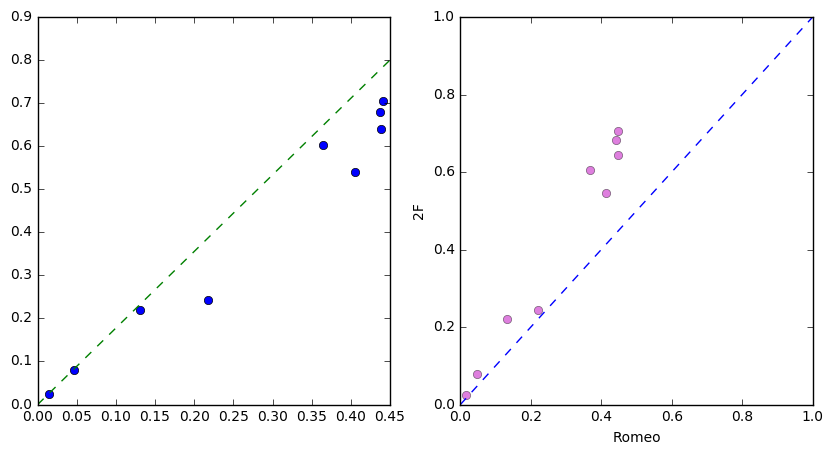

In [89]:
fig = plt.figure(figsize=[10, 5])
ax = plt.subplot(121)
ax.plot(romeo_min[1:], invQeff_min, 'o')
ax.plot(ax.get_xlim(), ax.get_ylim(), '--')
ax = plt.subplot(122)
ax.plot(romeo_max[1:], invQeff_max, 'o', color='m', alpha=0.5)
plt.xlabel('Romeo')
plt.ylabel('2F')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
ax.plot(ax.get_xlim(), ax.get_ylim(), '--');

In [90]:
zip(romeo_min[1:], invQeff_min)

[(0.21788829575690324, 0.24177247038684097),
 (0.40585968031443181, 0.54083806462655426),
 (0.43832933468685198, 0.63944106666464995),
 (0.43740706936174201, 0.6782239557103672),
 (0.44094284447933685, 0.70395046883894996),
 (0.36400153368617943, 0.60337763674036293),
 (0.13064978626726481, 0.21953803712014852),
 (0.046765460753479794, 0.079646789960767891),
 (0.014399030476521638, 0.024431829801964709)]

In [91]:
zip(romeo_max[1:], invQeff_max)

[(0.2204041501770011, 0.24323205603766357),
 (0.41359765963603512, 0.54535584164825224),
 (0.4461761040060106, 0.64402973691816123),
 (0.4428578446141469, 0.6813970235040695),
 (0.44604971113689362, 0.70692671105617633),
 (0.36712882269505548, 0.60519735114426176),
 (0.13162705375453279, 0.22010637936032551),
 (0.047063236959298121, 0.079819872912516104),
 (0.014495182616956127, 0.024487726651234214)]

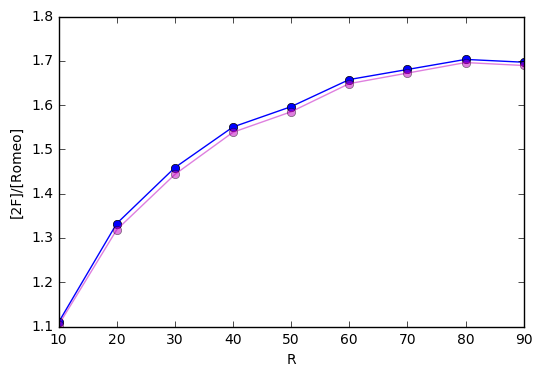

In [92]:
plt.plot(r_g_dens[1:], [l[1]/l[0] for l in zip(romeo_min[1:], invQeff_min)], 'o-')
plt.plot(r_g_dens[1:], [l[1]/l[0] for l in zip(romeo_max[1:], invQeff_max)], 'o-', color='m', alpha=0.5)
plt.xlabel('R')
plt.ylabel('[2F]/[Romeo]');

Да, стало лучше, но все равно, ошибка тут явно не такая уж маленькая.

### Влияние параметров на результат

Влияние скорости звука:

In [84]:
%%time
sound_rel = []
for c in np.linspace(4., 20., 20):
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data_, 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=c, 
                                    scale=scale,
                                    sigma=sig_R_maj_max,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data_, 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=c, 
                                    scale=scale,
                                    sigma=sig_R_maj_min,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

    sound_rel.append((invQeff_min, invQeff_max))

Wall time: 3min 38s


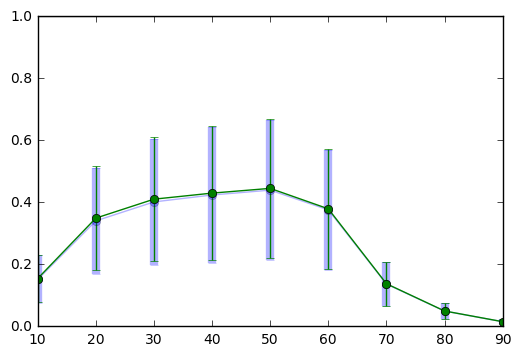

In [85]:
rr = zip(*total_gas_data)[0]
qmins = []
qmaxs = []
for ind, rrr in enumerate(rr):
    qmin = [sound_rel[l][0][ind] for l in range(20)]
    qmax = [sound_rel[l][1][ind] for l in range(20)]
    qmins.append((np.mean(qmin), np.std(qmin)))
    qmaxs.append((np.mean(qmax), np.std(qmax)))
plt.errorbar(rr, zip(*qmins)[0], fmt='o-', yerr=zip(*qmins)[1], elinewidth=6, alpha=0.3);
plt.errorbar(rr, zip(*qmaxs)[0], fmt='o-', yerr=zip(*qmaxs)[1])
plt.axhline(y=1., ls='-', color='grey');

Влияние изменения M/L:

In [86]:
%%time

sound_rel = [] #на самом деле M/L rel
for c in np.linspace(0.6, 10., 20):
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data_, 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_max,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), c, 'R')))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data_, 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_min,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), c, 'R')))

    sound_rel.append((invQeff_min, invQeff_max))

Wall time: 3min 54s


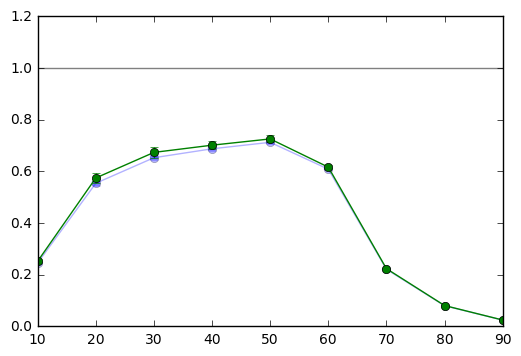

In [87]:
rr = zip(*total_gas_data)[0]
qmins = []
qmaxs = []
for ind, rrr in enumerate(rr):
    qmin = [sound_rel[l][0][ind] for l in range(20)]
    qmax = [sound_rel[l][1][ind] for l in range(20)]
    qmins.append((np.mean(qmin), np.std(qmin)))
    qmaxs.append((np.mean(qmax), np.std(qmax)))
plt.errorbar(rr, zip(*qmins)[0], fmt='o-', yerr=zip(*qmins)[1], elinewidth=6, alpha=0.3);
plt.errorbar(rr, zip(*qmaxs)[0], fmt='o-', yerr=zip(*qmaxs)[1])
plt.axhline(y=1., ls='-', color='grey');

Влияние масштаба распределения молекулярного газа (т.е. по сути, какая скорость убывания от $h$):

In [88]:
%%time

sound_rel = []
for c in np.array([0.25, 0.5, 1., 1.5, 2., 3.]):
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens[1:], 
                                                                        [He_coeff*(y_interp_(l[0], c*h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)[1:]]), 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_max,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens[1:], 
                                                                        [He_coeff*(y_interp_(l[0], c*h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)[1:]]), 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_min,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

    sound_rel.append((invQeff_min, invQeff_max))

Wall time: 1min 7s


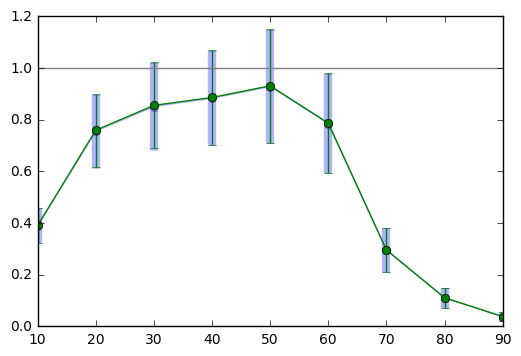

In [89]:
rr = zip(*total_gas_data)[0]
qmins = []
qmaxs = []
for ind, rrr in enumerate(rr):
    qmin = [sound_rel[l][0][ind] for l in range(6)]
    qmax = [sound_rel[l][1][ind] for l in range(6)]
    qmins.append((np.mean(qmin), np.std(qmin)))
    qmaxs.append((np.mean(qmax), np.std(qmax)))
plt.errorbar(rr, zip(*qmins)[0], fmt='o-', yerr=zip(*qmins)[1], elinewidth=6, alpha=0.3);
plt.errorbar(rr, zip(*qmaxs)[0], fmt='o-', yerr=zip(*qmaxs)[1])
plt.axhline(y=1., ls='-', color='grey');

Влияние величины молекулярного газа:

In [90]:
%%time
def y_interp_2(c0, r, h):
    return c0*np.exp(-r/h)

sound_rel = []
for c in np.array([1., 5., 10., 16.5, 20., 50., 100.]):
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens[1:], 
                                                                        [He_coeff*(y_interp_2(c, l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)[1:]]), 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_max,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens[1:], 
                                                                        [He_coeff*(y_interp_2(c, l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)[1:]]), 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gas,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_min,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

    sound_rel.append((invQeff_min, invQeff_max))

Wall time: 1min 12s


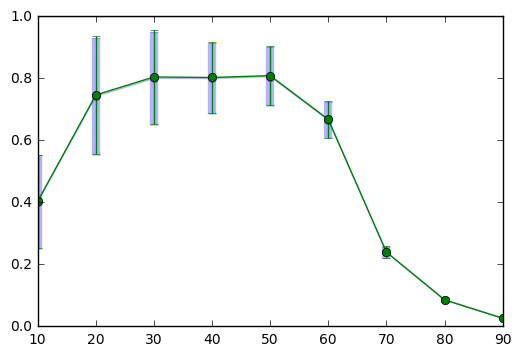

In [92]:
rr = zip(*total_gas_data)[0]
qmins = []
qmaxs = []
for ind, rrr in enumerate(rr):
    qmin = [sound_rel[l][0][ind] for l in range(6)]
    qmax = [sound_rel[l][1][ind] for l in range(6)]
    qmins.append((np.mean(qmin), np.std(qmin)))
    qmaxs.append((np.mean(qmax), np.std(qmax)))
plt.errorbar(rr, zip(*qmins)[0], fmt='o-', yerr=zip(*qmins)[1], elinewidth=6, alpha=0.3);
plt.errorbar(rr, zip(*qmaxs)[0], fmt='o-', yerr=zip(*qmaxs)[1])
plt.axhline(y=1., ls='-', color='grey');

In [79]:
plt.plot(r_g_dens[1:], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[1:], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

NameError: name 'invQeff' is not defined

Другая оценка $\sigma_R$: 

In [ ]:
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=gas_approx,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), M_to_L_R, 'R')))

In [ ]:
plt.plot(r_g_dens[1:], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[1:], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
# plt.xlim(0., 8./0.072)
plt.legend()
plt.grid()
plot_SF(plt.gca())
plt.show()

Тенденция как в дипломе, а вот конкретные цифры меньше. Если взять более массивную фотометрию:

In [ ]:
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=gas_approx,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I')))

In [ ]:
plt.plot(r_g_dens[1:], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[1:], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
# plt.xlim(0., 8./0.072)
plt.legend()
plt.grid()
plot_SF(plt.gca())
plt.show()

То все равно не хватает, очень уж много газа и мало звезд.

## Эксперименты

In [ ]:
Qgs = []
Qss = []
invQeff = []
for r, gd in zip(r_g_dens, gas_dens)[1:]: #только до 90" берем, дальне нет данных по дисперсии
#     print r, r*0.072, epicyclicFreq_real(gas_approx, r, scale), gd
    Qgs.append(Qg(epicycl=epicyclicFreq_real(gas_approx, r, scale), sound_vel=sound_vel, gas_density=gd*He_coeff))
    Qss.append(Qs(epicycl=epicyclicFreq_real(gas_approx, r, scale), sigma=sig_R_approx(r), 
                  star_density=surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I)))
    print r, Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), 
    qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), np.arange(0.01, 60000., 1.))
    print qeff, 1./qeff[0]
    invQeff.append(qeff)

In [ ]:
plt.plot(r_g_dens[1:], map(lambda l: 1./l, Qgs), '.-', label='Qg')
plt.plot(r_g_dens[1:], zip(*invQeff)[1], 'v-', label='Qeff')
# plt.ylim(0., 2.1)
plt.xlim(0., 8./0.072)
plt.legend()
plt.show()

Опять что-то совсем не то.

In [ ]:
Qgs = []
Qss = []
invQeff = []
for r, gd in zip(r_g_dens, gas_dens)[1:]: #только до 90" берем, дальше нет данных по дисперсии
#     print r, r*0.072, epicyclicFreq_real(gas_approx, r, scale), gd
    Qgs.append(Qg(epicycl=epicyclicFreq_real(gas_approx, r, scale), sound_vel=sound_vel, gas_density=gd*He_coeff))
    Qss.append(Qs(epicycl=epicyclicFreq_real(gas_approx, r, scale), sigma=sig_R_approx(r), 
                  star_density=surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I)))
    print r, Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), 
    qeff = findInvKinemQeffBrute(Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), np.arange(0.01, 60000., 1.))
    print qeff, 1./qeff[0]
    invQeff.append(qeff)

In [ ]:
plt.plot(r_g_dens[1:], map(lambda l: 1./l, Qgs), '.-', label='Qg')
plt.plot(r_g_dens[1:], zip(*invQeff)[1], 'v-', label='Qeff')
plt.ylim(0., 21)
plt.xlim(0., 8./0.072)
plt.legend()
plt.show()

In [ ]:
plt.plot(r_g_dens[1:], [epicyclicFreq_real(gas_approx, r, scale) for r in r_g_dens[1:]], 'o-')
plt.plot(r_g_dens[1:], [sig_R_approx(r) for r in r_g_dens[1:]], 'd-')
plt.plot(r_g_dens[1:], [surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I) for r in r_g_dens[1:]], 'v-')

TODO: почему такие странные провалы? (смотри ниже) Это не очень важно, но странно

In [ ]:
# другая модель, оценка снизу
sig_R_approx = spl_min

In [ ]:
Qgs = []
Qss = []
invQeff = []
for r, gd in zip(r_g_dens, gas_dens)[1:]: #только до 90" берем, дальне нет данных по дисперсии
#     print r, r*0.072, epicyclicFreq_real(gas_approx, r, scale), gd
    Qgs.append(Qg(epicycl=epicyclicFreq_real(gas_approx, r, scale), sound_vel=sound_vel, gas_density=gd*He_coeff))
    Qss.append(Qs(epicycl=epicyclicFreq_real(gas_approx, r, scale), sigma=sig_R_approx(r), 
                  star_density=surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I)))
    print r, Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), 
    qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), np.arange(0.01, 60000., 1.))
    print qeff, 1./qeff[0]
    invQeff.append(qeff)

In [ ]:
plt.plot(r_g_dens[1:], map(lambda l: 1./l, Qgs), '.-', label='Qg')
plt.plot(r_g_dens[1:], zip(*invQeff)[1], 'v-', label='Qeff')
# plt.ylim(0., 2.1)
plt.xlim(0., 8./0.072)
plt.legend()
plt.show()